In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size=0.2,random_state=42)

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


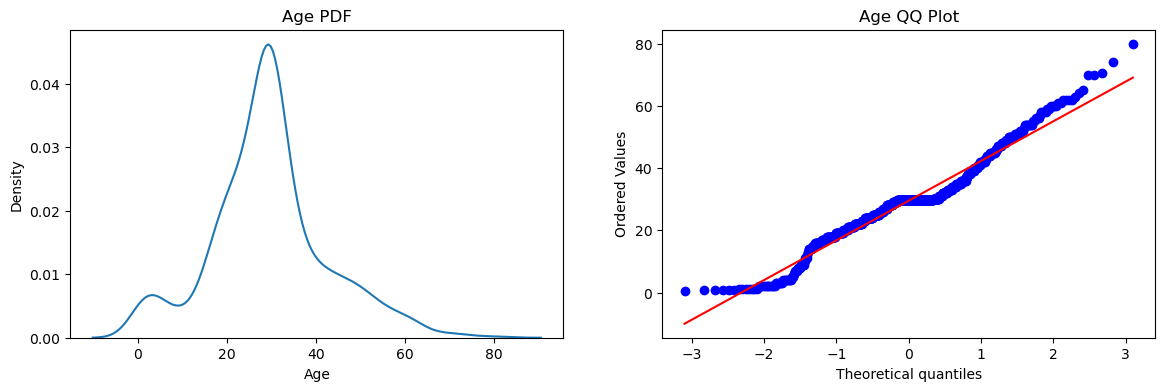

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


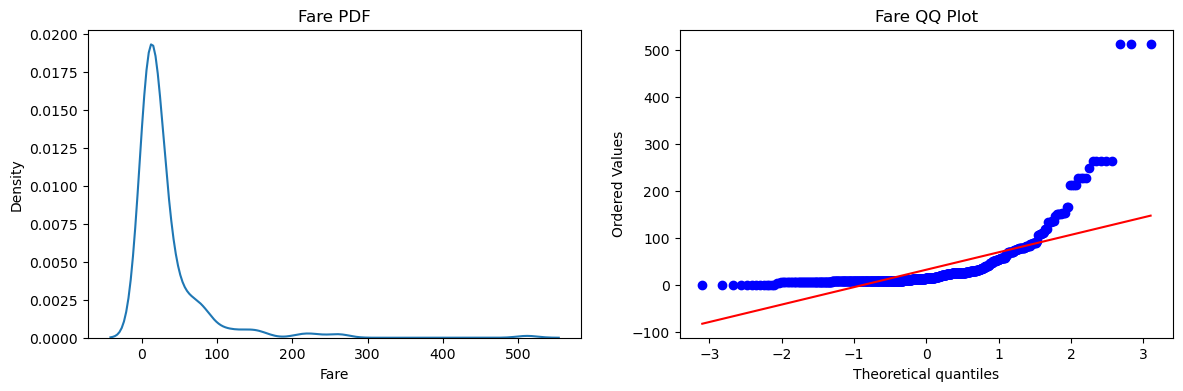

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

# without applying transformation

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


# with log transformation as we can see right skewed data 

In [23]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


In [26]:
X_transformed = trf.fit_transform(df.iloc[:,1:3])

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,df.iloc[:,0],scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,df.iloc[:,0],scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6622222222222222


# Visulizing effect on Fare distribution after applying transformation

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


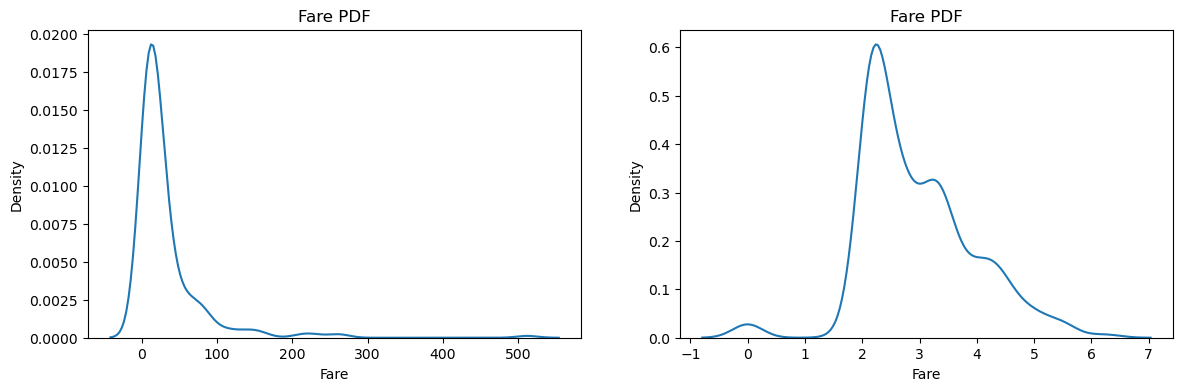

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
sns.kdeplot(X_train_transformed['Fare'])
plt.title('Fare PDF')
plt.show()

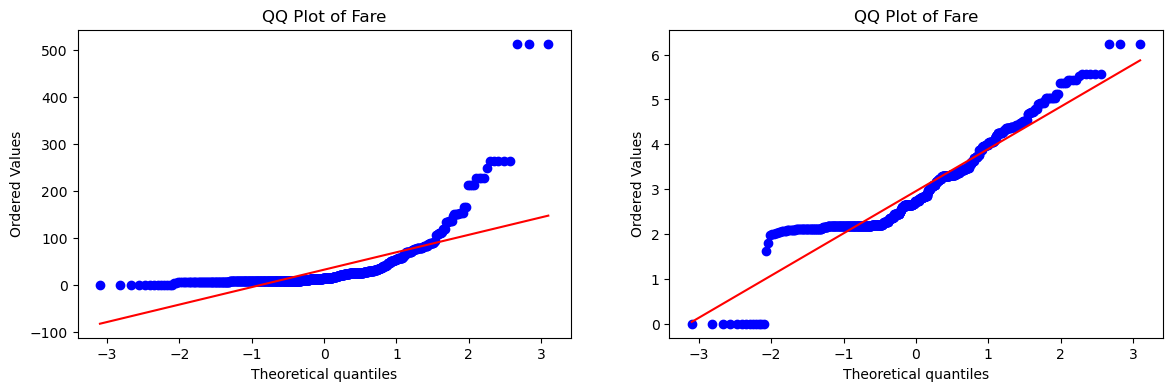

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('QQ Plot of Fare')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('QQ Plot of Fare')

plt.show()

# Visulizing effect on Age distribution after applying transformation

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


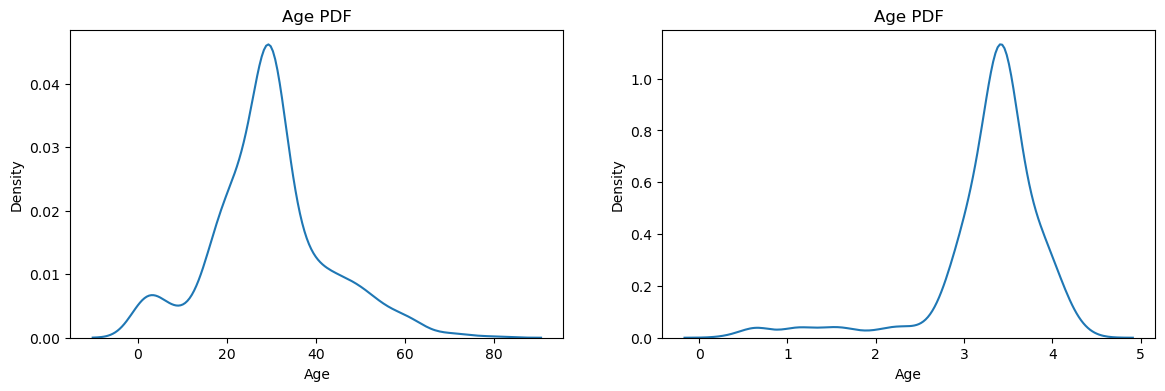

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
sns.kdeplot(X_train_transformed['Age'])
plt.title('Age PDF')
plt.show()

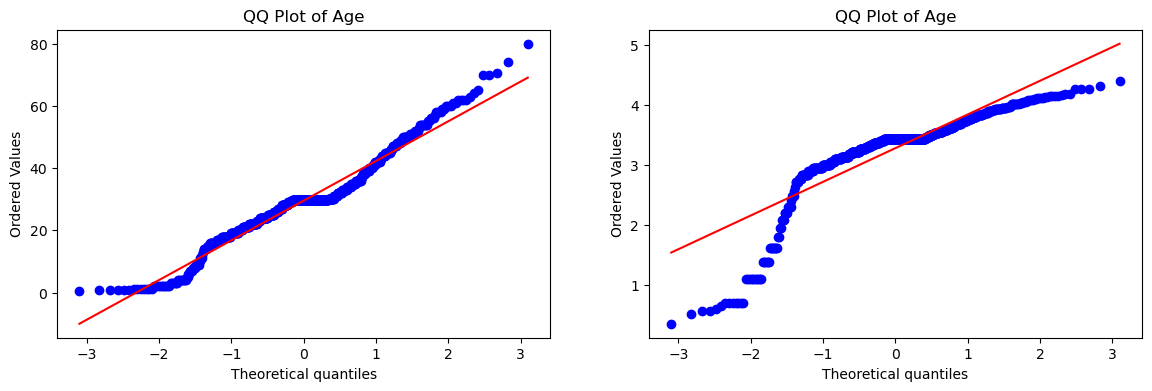

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('QQ Plot of Age')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('QQ Plot of Age')

plt.show()

### As we seen Applying transformation on Age column , resulted in it being a bit left skewed so lets apply only on fare and check the performance of the model

In [39]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed_new = trf2.fit_transform(X_train)
X_test_transformed_new = trf2.transform(X_test)

In [41]:
# Initialize models
clf_new = LogisticRegression()
clf2_new = DecisionTreeClassifier()

# Fit models on training data
clf_new.fit(X_train_transformed_new, y_train)
clf2_new.fit(X_train_transformed_new, y_train)

# Use trained models for predictions
y_pred_new = clf_new.predict(X_test_transformed_new)  
y_pred2_new = clf2_new.predict(X_test_transformed_new)  

# Print accuracy
print("Accuracy LR:", accuracy_score(y_test, y_pred_new))
print("Accuracy DT:", accuracy_score(y_test, y_pred2_new))

Accuracy LR: 0.6703910614525139
Accuracy DT: 0.6703910614525139


In [46]:
X_transformed2 = trf2.fit_transform(df.iloc[:,1:3])

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,df.iloc[:,0],scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,df.iloc[:,0],scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6610611735330836


In [47]:
# Not much change on performance if not apply transformation on Age feature


In [48]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('transform',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

In [63]:
apply_transform(lambda x : (x)**1)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PARTH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PARTH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PARTH\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PARTH\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\PARTH\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\PARTH\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float64').
